In [1]:
# importing module
from pandas import *
 
# reading CSV file
data = read_csv("dataset.csv")
 
# converting column data to list
price = data['price'].tolist()
weight = data['weight'].tolist()
 
# printing list data
print('weight:', weight)
print('price:', price)

weight: [94, 506, 416, 992, 649, 237, 457, 815, 446, 422, 791, 359, 667, 598, 7, 544, 334, 766, 994, 893, 633, 131, 428, 700, 617, 874, 720, 419, 794, 196, 997, 116, 908, 539, 707, 569, 537, 931, 726, 487, 772, 513, 81, 943, 58, 303, 764, 536, 724, 789, 479, 142, 339, 641, 196, 494, 66, 824, 208, 711, 800, 314, 289, 401, 466, 689, 833, 225, 244, 849, 113, 379, 361, 65, 486, 686, 286, 889, 24, 491, 891, 90, 181, 214, 17, 472, 418, 419, 356, 682, 306, 201, 385, 952, 500, 194, 737, 324, 992, 224, 260, 97, 210, 649, 919, 63, 958, 804, 518, 428, 537, 346, 153, 971, 662, 197, 91, 529, 126, 747, 469, 770, 934, 723, 895, 568, 172, 958, 383, 308, 970, 583, 48, 930, 569, 3, 20, 609, 887, 825, 930, 904, 241, 379, 376, 962, 889, 443, 216, 338, 160, 406, 159, 31, 204, 420, 153, 425, 331, 565, 838, 9, 918, 533, 232, 957, 591, 576, 746, 377, 858, 86, 434, 558, 279, 840, 735, 574, 126, 912, 739, 821, 625, 917, 201, 993, 149, 52, 759, 267, 256, 783, 117, 516, 180, 25, 380, 712, 266, 216]
price: [294, 7

In [2]:
print(type(price))

<class 'list'>


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from deap import base, tools, creator, algorithms
import random

creator.create('FitnessMax', base.Fitness, weights=(1.0,))
creator.create('Individual', list, fitness=creator.FitnessMax)

geneLength = 200
toolbox = base.Toolbox()
toolbox.register('genBinary', random.randint, 0, 1)
toolbox.register('individual', tools.initRepeat, creator.Individual,toolbox.genBinary, geneLength)

weightList = weight
valueList = price

def evaluate(ind):
    return (np.sum(np.asarray(valueList)*np.asarray(ind))),
toolbox.register('evaluate', evaluate)

def feasiblity(i, W=80000):
    Tweight = np.sum(np.asarray(weight)*np.asarray(i))
    if Tweight <= W:
        return True
    return False

toolbox.decorate('evaluate', tools.DeltaPenalty(feasiblity, -10))
toolbox.register('select', tools.selTournament, tournsize=2)
toolbox.register('mate', tools.cxTwoPoint)
toolbox.register('mutate', tools.mutFlipBit, indpb=0.5)

popSize = 100
toolbox.register('population', tools.initRepeat, list, toolbox.individual)
pop = toolbox.population(popSize)

stats = tools.Statistics(key=lambda i:i.fitness.values)
stats.register('max', np.max)
stats.register('avg', np.mean)
stats.register('std', np.std)
logbook = tools.Logbook()
logbook.header = ['gen', 'nevals'] + (stats.fields)

invalid_ind = [i for i in pop if not i.fitness.valid]
fitnessFun = toolbox.map(toolbox.evaluate, invalid_ind)
for fitness, i in zip(fitnessFun, invalid_ind):
    i.fitness.values = fitness

record = stats.compile(pop)
logbook.record(gen=0, nevals=len(invalid_ind),**record)

ngen = 400
cxpb = 0.8
mutpb = 0.2

for gen in range(1, ngen+1):

    offspring = toolbox.select(pop, popSize)
    offspring = [toolbox.clone(_) for _ in offspring]

    for i1, i2 in zip(offspring[::2], offspring[1::2]):
        if random.random()<cxpb:
            toolbox.mate(i1, i2)
            del i1.fitness.values
            del i2.fitness.values

    for i in offspring:
        if random.random()<mutpb:
            toolbox.mutate(i)
            del i.fitness.values

    invalid_ind = [i for i in offspring if not i.fitness.valid]
    fitnessFun = toolbox.map(toolbox.evaluate, invalid_ind)
    for fitness, i in zip(fitnessFun, invalid_ind):
        i.fitness.values = fitness

    combindPop = pop + offspring
    pop = tools.selBest(combindPop, popSize)

    record = stats.compile(pop)
    logbook.record(gen = gen, nevals = len(invalid_ind), **record)
print(logbook)

E:\Anaconda\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
E:\Anaconda\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	nevals	max   	avg    	std    
0  	100   	85087 	70710.3	5128.52
1  	92    	86317 	75825.4	3498.55
2  	85    	88626 	79625  	2999.05
3  	74    	89493 	82847.6	2235.15
4  	88    	89550 	85296.8	1532.58
5  	82    	93697 	87047.3	1826.89
6  	85    	97702 	89026.9	2207.28
7  	85    	97702 	91732  	2389.95
8  	81    	99870 	94036.9	2035.73
9  	83    	101561	96276.6	1678.54
10 	83    	101561	98116  	1379   
11 	81    	105269	99774.5	1365.09
12 	83    	106094	101322 	1525.55
13 	86    	108088	102773 	1560.65
14 	87    	110410	104658 	1477.27
15 	88    	110410	106422 	1398.1 
16 	87    	110410	107943 	1332.71
17 	78    	112121	109175 	874.938
18 	80    	112691	110058 	829.201
19 	76    	112691	110782 	710.255
20 	88    	112691	111450 	614.254
21 	88    	112893	111985 	490.736
22 	81    	112893	112390 	298.621
23 	82    	112893	112673 	79.7429
24 	87    	112893	112705 	42.846 
25 	81    	112893	112717 	52.2069
26 	87    	112893	112746 	65.7409
27 	83    	112893	112787 	62.0016
28 	89    	112

Best Solution: [0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Best Fitness: 113025.0
Sum of Weight: 79825


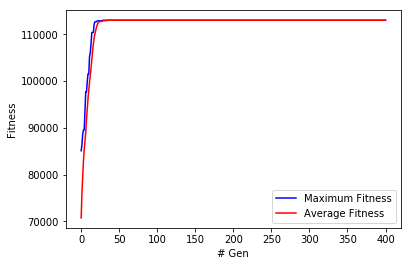

In [5]:
best = tools.selBest(pop,1)[0]
finalFit = best.fitness.values[0]
Tweight = np.sum(np.asarray(weight)*np.asarray(best))
print('Best Solution: '+str(best))
print('Best Fitness: '+str(finalFit))
print('Sum of Weight: '+str(Tweight))

maxFit = logbook.select('max')
avgFit = logbook.select('avg')
plt.plot(maxFit, 'b-', label='Maximum Fitness')
plt.plot(avgFit, 'r-', label='Average Fitness')
plt.xlabel('# Gen')
plt.ylabel('Fitness')
plt.legend(loc='best')

In [6]:
from random import random
import random
import math

import matplotlib.pyplot as plt
import matplotlib 

In [7]:
prices = price
weights = weight
items = len(data)
sumWeight = 80000

In [4]:
def calculate(knapsack):
    list = np.array(knapsack)
    arrWeight = np.array(weights)
    arrPrice = np.array(prices)
    itemWeight = np.dot(list, arrWeight)
    itemValue = np.dot(list, arrPrice)

    
    return [itemWeight-sumWeight, itemWeight] if itemWeight > sumWeight else [itemValue, itemWeight]

def initiation(population):

    np.random.seed(1)
    knapsack = np.random.binomial(1, population, size=items)
    return knapsack

def neighborAl(knapsack):
    nbh = []
    for i in range(0, items):
        exchange = list(knapsack)
        nbh.append(exchange)
        (nbh[i][i]) = 0 if nbh[i][i] == 1 else 1
    return nbh

In [5]:
def simulatedAnn(population, temperature, iterations, finalT):

    currentVal = initiation(population)
    bestCap = currentVal[:]
    currentRes = calculate(currentVal)[:]
    bestRes = currentRes[:]
    
    solutions = 0
    improvementsAll = 0
    randomSum = 0

    a = 0

    while (temperature/(a+1) > finalT):
        ranSteps = 0
        improvements = 0
        y = 0
        
        while (y < iterations):
            solutions += 1
            NBH = neighborAl(currentVal)
            z = NBH[random.randint(0, len(NBH)-1)]
            if (calculate(z)[0] > currentRes[0]):
                improvements += 1
                currentVal = z[:]
                currentRes = calculate(z)[:]
            else:
                omega = calculate(currentVal)[0] - calculate(z)[0]
                ranVal = math.exp(-1 * omega * (a+1) / (temperature))
                odds = random.uniform(0,1)
                if (odds < ranVal):
                    ranSteps += 1
                    currentVal = z[:]
                    currentRes = calculate(z)[:]      

            if(currentRes[0] > bestRes[0]):
                bestRes = currentRes[:]
                bestCap = currentVal[:]
            y += 1

        a += 1
        improvementsAll += improvements
        randomSum += ranSteps

    sol = np.array(bestCap)
    intemWeight = bestRes[1]
    itemValue = bestRes[0]

    return sol, itemValue, intemWeight

In [6]:
def excuteSAS(runNums, population,temperature, iterations,  finalT):
    arrVal = []
    arrWei = []
    for i in range(runNums):
        knapsack, itemValue, intemWeight = simulatedAnn(population,temperature, iterations, finalT)
        print("\nTotal value: %0.1f " % itemValue)
        print("Total weight: %0.1f " % intemWeight)
        arrVal.append(itemValue)
        arrWei.append(intemWeight)
    return arrVal, arrWei

In [7]:
def graphGenerator(arrVal, arrWei, name, runNums):
    fig,ax = plt.subplots(figsize=(10,8))
    
    ax2=ax.twinx()
    ax2.plot(range(1,11),arrWei,color="green",marker="x")
    ax2.set_ylabel('Final total weight of knapsack',color="black",fontsize=15)
    
    ax.plot(range(1,11),arrVal, color="orange", marker="o")
    ax.set_xlabel('Number of runs of the ' + str(name),fontsize=15)
    ax.set_ylabel('Final total value of knapsack',color="black",fontsize=15)
    
    plt.title("Final total value and weight of knapsack in " + str(runNums)+ " runs",fontsize=18)
    plt.xticks(np.arange(1, 11, 1.0))
    plt.show()
    avg_v_total = np.mean(arrVal)
    avg_w_total = np.mean(arrWei)

In [14]:
finalT = 5
iterations = 50
temperature = 8000
population = 0.1
runNums = 10

name = "Simulated Annealing"
arrVal, arrWei = excuteSAS(runNums, population,temperature, iterations,  finalT)

Number of runs of the algorithm = 1

Starting solve() 
Simulated Annealing
Initial Proportion of items: 0.1
Initial temperature: 8000
Final temperature: 5
Number of Iterations: 50
Initial Solution:  0.1
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1]
Total number of random steps: 402 
 Total number of improvements: 541
Number of packings checked: 79950

Best packing found: 
[1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 

Total number of random steps: 386 
 Total number of improvements: 526
Number of packings checked: 79950

Best packing found: 
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1
 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1]

Total value of packing = 115079.0 
Total weight of packing = 79979.0 
_______________________________________________________________________________________________
Number of runs of the algorithm = 8

Starting solve() 
Simulated Annealing
Initial Proportion of items: 0.1
Initial temperature: 8000
Final temperature: 5
Number of Iterations: 50
Initial Solution:  0.1
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0

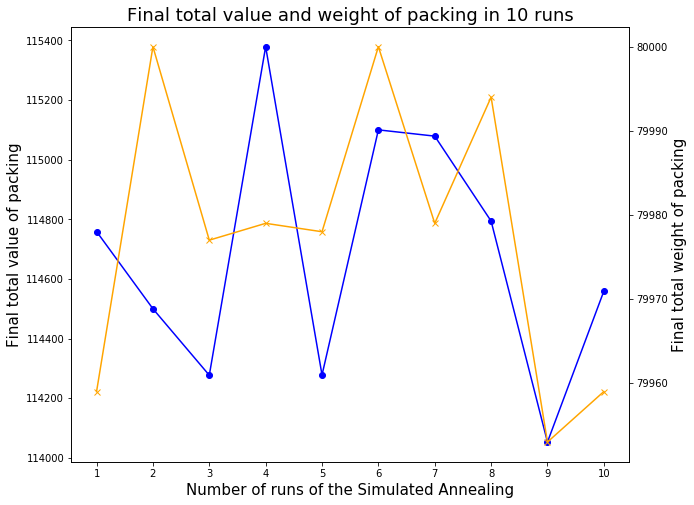


Average total value of packing in 10 runs = 114677.8 

Average total weight of packing in 10 runs = 79977.8 


In [15]:
graphGenerator(arrVal, arrWei, name, runNums)

In [10]:
def tabu(population, tabuTimes, bestStepsMax):
    
    currentVal = initiation(population)
    currentRes = calculate(currentVal)
    
    bestRes = currentRes[:]
    bestSol = currentRes[:]
    bestCap = currentVal[:]
    
    solutions = 0
    tabuList = [0] * items
    count = 0

    while (count < bestStepsMax):
        neighbour = 0
        bestRes[0] = 0
        NBH = neighborAl(currentVal)
        
        for s in NBH:
            solutions += 1
            if (calculate(s)[0] > bestRes[0]) and (tabuList[neighbour]==0):
                currentVal = s[:]
                visitedNei = neighbour
                bestRes = calculate(s)[:]
                
            if (calculate(s)[0] > bestSol[0]):
                currentVal = s[:]
                bestK = s[:]
                bestRes = calculate(s)[:]
                bestSol = calculate(s)[:]
                visitedNei = neighbour
                var = 1
            neighbour += 1

        
        if(var == 1):
            var = 0
            counter = 0
        counter += 1
        for i in range(0,len(tabuList)-1):
            tbl = tabuList[i]
            if(tbl > 0):
                tabuList[i] = tbl - 1
        
        tabuList[visitedNei] = tabuTimes
    
    sol = np.array(bestK)
    itemValue = bestSol[0]
    itemWeight = bestSol[1]

    return sol, itemValue, itemWeight

In [11]:
def excuteTS(runNums, population,tabuTimes, bestStepsMax):
    arrVal = []
    arrWei = []
    for i in range(runNums):
        knapsack, itemValue, itemWeight = tabu(population,tabuTimes, bestStepsMax)
        print("\nTotal value of knapsack = %0.1f " % itemValue)
        print("Total weight of knapsack = %0.1f " % itemWeight)
        arrVal.append(itemValue)
        arrWei.append(itemWeight)
    return arrVal, arrWei

In [12]:
bestStepsMax = 100
tabuTimes = 30
population = 0.1
runNums = 10

name = "Tabu Search"
arrVal, arrWei = excuteTS(runNums, population,tabuTimes, bestStepsMax)

Number of runs of the algorithm = 1

Starting solve() 
Tabu Search
Initial Proportion of items =  0.1
Tabu tenure =  30
Maximum super best steps =  100
Initial Solution:  0.1
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1]
Neighbour selected: 133 , Best_value: 15632
Highest total value found: 15632


Neighbour selected: 140 , Best_value: 16862
Highest total value found: 16862


Neighbour selected: 162 , Best_value: 18080
Highest total value found: 18080


Neighbour selected: 179 , Best_value: 19292
Highest total value found: 19292


Neighbour selected: 30 , Best_value: 20489
Highest total value found: 20489


Neighbour selected: 18 ,

Neighbour selected: 81 , Best_value: 106176
Highest total value found: 106176


Neighbour selected: 84 , Best_value: 106393
Highest total value found: 106393


Neighbour selected: 14 , Best_value: 106600
Highest total value found: 106600


Neighbour selected: 21 , Best_value: 106269
Highest total value found: 106600


Neighbour selected: 118 , Best_value: 106695
Highest total value found: 106695


Neighbour selected: 112 , Best_value: 106342
Highest total value found: 106695


Neighbour selected: 178 , Best_value: 106768
Highest total value found: 106768


Neighbour selected: 153 , Best_value: 106999
Highest total value found: 106999


Neighbour selected: 91 , Best_value: 106598
Highest total value found: 106999


Neighbour selected: 184 , Best_value: 106999
Highest total value found: 106999


Neighbour selected: 68 , Best_value: 106555
Highest total value found: 106999


Neighbour selected: 148 , Best_value: 107071
Highest total value found: 107071


Neighbour selected: 195 , Best_val

Neighbour selected: 178 , Best_value: 107873
Highest total value found: 108474


Neighbour selected: 136 , Best_value: 107653
Highest total value found: 108474


Neighbour selected: 0 , Best_value: 107359
Highest total value found: 108474


Neighbour selected: 21 , Best_value: 107690
Highest total value found: 108474


Neighbour selected: 195 , Best_value: 107465
Highest total value found: 108474


Neighbour selected: 116 , Best_value: 107174
Highest total value found: 108474


Neighbour selected: 192 , Best_value: 107491
Highest total value found: 108474


Neighbour selected: 84 , Best_value: 107274
Highest total value found: 108474


Neighbour selected: 58 , Best_value: 106866
Highest total value found: 108474


Neighbour selected: 164 , Best_value: 107298
Highest total value found: 108474


Neighbour selected: 153 , Best_value: 107067
Highest total value found: 108474


Neighbour selected: 132 , Best_value: 106719
Highest total value found: 108474


Neighbour selected: 44 , Best_val

Highest total value found: 15632


Neighbour selected: 140 , Best_value: 16862
Highest total value found: 16862


Neighbour selected: 162 , Best_value: 18080
Highest total value found: 18080


Neighbour selected: 179 , Best_value: 19292
Highest total value found: 19292


Neighbour selected: 30 , Best_value: 20489
Highest total value found: 20489


Neighbour selected: 18 , Best_value: 21683
Highest total value found: 21683


Neighbour selected: 185 , Best_value: 22876
Highest total value found: 22876


Neighbour selected: 3 , Best_value: 24068
Highest total value found: 24068


Neighbour selected: 98 , Best_value: 25260
Highest total value found: 25260


Neighbour selected: 113 , Best_value: 26431
Highest total value found: 26431


Neighbour selected: 130 , Best_value: 27601
Highest total value found: 27601


Neighbour selected: 145 , Best_value: 28763
Highest total value found: 28763


Neighbour selected: 106 , Best_value: 29921
Highest total value found: 29921


Neighbour selected: 12

Neighbour selected: 132 , Best_value: 107687
Highest total value found: 107687


Neighbour selected: 161 , Best_value: 107896
Highest total value found: 107896


Neighbour selected: 194 , Best_value: 107416
Highest total value found: 107896


Neighbour selected: 82 , Best_value: 107797
Highest total value found: 107896


Neighbour selected: 76 , Best_value: 107311
Highest total value found: 107896


Neighbour selected: 62 , Best_value: 107800
Highest total value found: 107896


Neighbour selected: 199 , Best_value: 107284
Highest total value found: 107896


Neighbour selected: 83 , Best_value: 107698
Highest total value found: 107896


Neighbour selected: 154 , Best_value: 107194
Highest total value found: 107896


Neighbour selected: 115 , Best_value: 107591
Highest total value found: 107896


Neighbour selected: 135 , Best_value: 107388
Highest total value found: 107896


Neighbour selected: 78 , Best_value: 107064
Highest total value found: 107896


Neighbour selected: 158 , Best_va

Neighbour selected: 81 , Best_value: 106397
Highest total value found: 108474


Neighbour selected: 101 , Best_value: 106694
Highest total value found: 108474


Neighbour selected: 21 , Best_value: 106363
Highest total value found: 108474


Neighbour selected: 31 , Best_value: 106679
Highest total value found: 108474


Neighbour selected: 136 , Best_value: 106899
Highest total value found: 108474


Neighbour selected: 192 , Best_value: 106582
Highest total value found: 108474


Neighbour selected: 70 , Best_value: 106895
Highest total value found: 108474


Neighbour selected: 102 , Best_value: 106385
Highest total value found: 108474


Neighbour selected: 58 , Best_value: 106793
Highest total value found: 108474


Neighbour selected: 164 , Best_value: 106361
Highest total value found: 108474


Neighbour selected: 5 , Best_value: 106798
Highest total value found: 108474


Neighbour selected: 44 , Best_value: 106540
Highest total value found: 108474


Neighbour selected: 132 , Best_value

Neighbour selected: 57 , Best_value: 55128
Highest total value found: 55128


Neighbour selected: 181 , Best_value: 56149
Highest total value found: 56149


Neighbour selected: 26 , Best_value: 57169
Highest total value found: 57169


Neighbour selected: 7 , Best_value: 58184
Highest total value found: 58184


Neighbour selected: 60 , Best_value: 59184
Highest total value found: 59184


Neighbour selected: 28 , Best_value: 60178
Highest total value found: 60178


Neighbour selected: 10 , Best_value: 61169
Highest total value found: 61169


Neighbour selected: 49 , Best_value: 62158
Highest total value found: 62158


Neighbour selected: 191 , Best_value: 63141
Highest total value found: 63141


Neighbour selected: 121 , Best_value: 64111
Highest total value found: 64111


Neighbour selected: 17 , Best_value: 65077
Highest total value found: 65077


Neighbour selected: 188 , Best_value: 66036
Highest total value found: 66036


Neighbour selected: 119 , Best_value: 66983
Highest total val

Neighbour selected: 161 , Best_value: 105688
Highest total value found: 107896


Neighbour selected: 132 , Best_value: 105340
Highest total value found: 107896


Neighbour selected: 44 , Best_value: 105598
Highest total value found: 107896


Neighbour selected: 82 , Best_value: 105217
Highest total value found: 107896


Neighbour selected: 194 , Best_value: 105697
Highest total value found: 107896


Neighbour selected: 62 , Best_value: 105208
Highest total value found: 107896


Neighbour selected: 76 , Best_value: 105694
Highest total value found: 107896


Neighbour selected: 83 , Best_value: 105280
Highest total value found: 107896


Neighbour selected: 154 , Best_value: 105784
Highest total value found: 107896


Neighbour selected: 135 , Best_value: 105987
Highest total value found: 107896


Neighbour selected: 115 , Best_value: 105590
Highest total value found: 107896


Neighbour selected: 58 , Best_value: 105998
Highest total value found: 107896


Neighbour selected: 148 , Best_val

Neighbour selected: 101 , Best_value: 107187
Highest total value found: 108474


Neighbour selected: 0 , Best_value: 107481
Highest total value found: 108474


Neighbour selected: 31 , Best_value: 107165
Highest total value found: 108474


Neighbour selected: 178 , Best_value: 107591
Highest total value found: 108474


Neighbour selected: 136 , Best_value: 107371
Highest total value found: 108474


Neighbour selected: 70 , Best_value: 107058
Highest total value found: 108474


Neighbour selected: 51 , Best_value: 107400
Highest total value found: 108474


Neighbour selected: 81 , Best_value: 107010
Highest total value found: 108474


Neighbour selected: 171 , Best_value: 107296
Highest total value found: 108474


Neighbour selected: 58 , Best_value: 106888
Highest total value found: 108474


Neighbour selected: 102 , Best_value: 107398
Highest total value found: 108474


Neighbour selected: 132 , Best_value: 107050
Highest total value found: 108474


Neighbour selected: 161 , Best_valu

Neighbour selected: 74 , Best_value: 90414
Highest total value found: 90414


Neighbour selected: 177 , Best_value: 91188
Highest total value found: 91188


Neighbour selected: 35 , Best_value: 91957
Highest total value found: 91957


Neighbour selected: 134 , Best_value: 92726
Highest total value found: 92726


Neighbour selected: 125 , Best_value: 93494
Highest total value found: 93494


Neighbour selected: 159 , Best_value: 94259
Highest total value found: 94259


Neighbour selected: 15 , Best_value: 95003
Highest total value found: 95003


Neighbour selected: 33 , Best_value: 95742
Highest total value found: 95742


Neighbour selected: 36 , Best_value: 96479
Highest total value found: 96479


Neighbour selected: 110 , Best_value: 97216
Highest total value found: 97216


Neighbour selected: 47 , Best_value: 97952
Highest total value found: 97952


Neighbour selected: 163 , Best_value: 98685
Highest total value found: 98685


Neighbour selected: 155 , Best_value: 99405
Highest total 

Neighbour selected: 178 , Best_value: 107873
Highest total value found: 108474


Neighbour selected: 136 , Best_value: 107653
Highest total value found: 108474


Neighbour selected: 0 , Best_value: 107359
Highest total value found: 108474


Neighbour selected: 21 , Best_value: 107690
Highest total value found: 108474


Neighbour selected: 195 , Best_value: 107465
Highest total value found: 108474


Neighbour selected: 116 , Best_value: 107174
Highest total value found: 108474


Neighbour selected: 192 , Best_value: 107491
Highest total value found: 108474


Neighbour selected: 84 , Best_value: 107274
Highest total value found: 108474


Neighbour selected: 58 , Best_value: 106866
Highest total value found: 108474


Neighbour selected: 164 , Best_value: 107298
Highest total value found: 108474


Neighbour selected: 153 , Best_value: 107067
Highest total value found: 108474


Neighbour selected: 132 , Best_value: 106719
Highest total value found: 108474


Neighbour selected: 44 , Best_val

Neighbour selected: 93 , Best_value: 34546
Highest total value found: 34546


Neighbour selected: 43 , Best_value: 35689
Highest total value found: 35689


Neighbour selected: 175 , Best_value: 36829
Highest total value found: 36829


Neighbour selected: 122 , Best_value: 37963
Highest total value found: 37963


Neighbour selected: 37 , Best_value: 39094
Highest total value found: 39094


Neighbour selected: 183 , Best_value: 40211
Highest total value found: 40211


Neighbour selected: 141 , Best_value: 41315
Highest total value found: 41315


Neighbour selected: 124 , Best_value: 42410
Highest total value found: 42410


Neighbour selected: 19 , Best_value: 43503
Highest total value found: 43503


Neighbour selected: 80 , Best_value: 44594
Highest total value found: 44594


Neighbour selected: 77 , Best_value: 45683
Highest total value found: 45683


Neighbour selected: 146 , Best_value: 46772
Highest total value found: 46772


Neighbour selected: 138 , Best_value: 47859
Highest total 

Neighbour selected: 135 , Best_value: 107388
Highest total value found: 107896


Neighbour selected: 78 , Best_value: 107064
Highest total value found: 107896


Neighbour selected: 158 , Best_value: 106533
Highest total value found: 107896


Neighbour selected: 97 , Best_value: 107157
Highest total value found: 107896


Neighbour selected: 136 , Best_value: 106937
Highest total value found: 107896


Neighbour selected: 105 , Best_value: 107200
Highest total value found: 107896


Neighbour selected: 56 , Best_value: 106834
Highest total value found: 107896


Neighbour selected: 73 , Best_value: 107099
Highest total value found: 107896


Neighbour selected: 14 , Best_value: 106892
Highest total value found: 107896


Neighbour selected: 84 , Best_value: 106675
Highest total value found: 107896


Neighbour selected: 81 , Best_value: 106285
Highest total value found: 107896


Neighbour selected: 70 , Best_value: 106598
Highest total value found: 107896


Neighbour selected: 118 , Best_value

Neighbour selected: 56 , Best_value: 106178
Highest total value found: 108474


Neighbour selected: 105 , Best_value: 105915
Highest total value found: 108474


Neighbour selected: 78 , Best_value: 106239
Highest total value found: 108474


Neighbour selected: 187 , Best_value: 106491
Highest total value found: 108474


Neighbour selected: 14 , Best_value: 106698
Highest total value found: 108474


Neighbour selected: 73 , Best_value: 106433
Highest total value found: 108474


Neighbour selected: 178 , Best_value: 106007
Highest total value found: 108474


Neighbour selected: 81 , Best_value: 106397
Highest total value found: 108474


Neighbour selected: 101 , Best_value: 106694
Highest total value found: 108474


Neighbour selected: 21 , Best_value: 106363
Highest total value found: 108474


Neighbour selected: 31 , Best_value: 106679
Highest total value found: 108474


Neighbour selected: 136 , Best_value: 106899
Highest total value found: 108474


Neighbour selected: 192 , Best_valu

Neighbour selected: 139 , Best_value: 54104
Highest total value found: 54104


Neighbour selected: 57 , Best_value: 55128
Highest total value found: 55128


Neighbour selected: 181 , Best_value: 56149
Highest total value found: 56149


Neighbour selected: 26 , Best_value: 57169
Highest total value found: 57169


Neighbour selected: 7 , Best_value: 58184
Highest total value found: 58184


Neighbour selected: 60 , Best_value: 59184
Highest total value found: 59184


Neighbour selected: 28 , Best_value: 60178
Highest total value found: 60178


Neighbour selected: 10 , Best_value: 61169
Highest total value found: 61169


Neighbour selected: 49 , Best_value: 62158
Highest total value found: 62158


Neighbour selected: 191 , Best_value: 63141
Highest total value found: 63141


Neighbour selected: 121 , Best_value: 64111
Highest total value found: 64111


Neighbour selected: 17 , Best_value: 65077
Highest total value found: 65077


Neighbour selected: 188 , Best_value: 66036
Highest total val

Neighbour selected: 62 , Best_value: 105208
Highest total value found: 107896


Neighbour selected: 76 , Best_value: 105694
Highest total value found: 107896


Neighbour selected: 83 , Best_value: 105280
Highest total value found: 107896


Neighbour selected: 154 , Best_value: 105784
Highest total value found: 107896


Neighbour selected: 135 , Best_value: 105987
Highest total value found: 107896


Neighbour selected: 115 , Best_value: 105590
Highest total value found: 107896


Neighbour selected: 58 , Best_value: 105998
Highest total value found: 107896


Neighbour selected: 148 , Best_value: 105482
Highest total value found: 107896


Neighbour selected: 91 , Best_value: 105883
Highest total value found: 107896


Neighbour selected: 105 , Best_value: 105620
Highest total value found: 107896


Neighbour selected: 56 , Best_value: 105986
Highest total value found: 107896


Neighbour selected: 73 , Best_value: 105721
Highest total value found: 107896


Neighbour selected: 78 , Best_value


Total value of packing = 108474.0 
Total weight of packing = 79974.0 
_______________________________________________________________________________________________
Number of runs of the algorithm = 7

Starting solve() 
Tabu Search
Initial Proportion of items =  0.1
Tabu tenure =  30
Maximum super best steps =  100
Initial Solution:  0.1
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1]
Neighbour selected: 133 , Best_value: 15632
Highest total value found: 15632


Neighbour selected: 140 , Best_value: 16862
Highest total value found: 16862


Neighbour selected: 162 , Best_value: 18080
Highest total value found: 18080


Neighbour sele

Neighbour selected: 91 , Best_value: 106598
Highest total value found: 106999


Neighbour selected: 184 , Best_value: 106999
Highest total value found: 106999


Neighbour selected: 68 , Best_value: 106555
Highest total value found: 106999


Neighbour selected: 148 , Best_value: 107071
Highest total value found: 107071


Neighbour selected: 195 , Best_value: 107296
Highest total value found: 107296


Neighbour selected: 189 , Best_value: 106829
Highest total value found: 107296


Neighbour selected: 102 , Best_value: 107339
Highest total value found: 107339


Neighbour selected: 132 , Best_value: 107687
Highest total value found: 107687


Neighbour selected: 161 , Best_value: 107896
Highest total value found: 107896


Neighbour selected: 194 , Best_value: 107416
Highest total value found: 107896


Neighbour selected: 82 , Best_value: 107797
Highest total value found: 107896


Neighbour selected: 76 , Best_value: 107311
Highest total value found: 107896


Neighbour selected: 62 , Best_va

Neighbour selected: 154 , Best_value: 107194
Highest total value found: 108474


Neighbour selected: 135 , Best_value: 107397
Highest total value found: 108474


Neighbour selected: 148 , Best_value: 106881
Highest total value found: 108474


Neighbour selected: 118 , Best_value: 107307
Highest total value found: 108474


Neighbour selected: 116 , Best_value: 107598
Highest total value found: 108474


Neighbour selected: 82 , Best_value: 107217
Highest total value found: 108474


Neighbour selected: 194 , Best_value: 107697
Highest total value found: 108474


Neighbour selected: 56 , Best_value: 107331
Highest total value found: 108474


Neighbour selected: 105 , Best_value: 107594
Highest total value found: 108474


Neighbour selected: 78 , Best_value: 107270
Highest total value found: 108474


Neighbour selected: 195 , Best_value: 107495
Highest total value found: 108474


Neighbour selected: 14 , Best_value: 107288
Highest total value found: 108474


Neighbour selected: 187 , Best_v

Neighbour selected: 59 , Best_value: 73473
Highest total value found: 73473


Neighbour selected: 34 , Best_value: 74380
Highest total value found: 74380


Neighbour selected: 23 , Best_value: 75280
Highest total value found: 75280


Neighbour selected: 65 , Best_value: 76169
Highest total value found: 76169


Neighbour selected: 75 , Best_value: 77055
Highest total value found: 77055


Neighbour selected: 89 , Best_value: 77937
Highest total value found: 77937


Neighbour selected: 167 , Best_value: 78813
Highest total value found: 78813


Neighbour selected: 12 , Best_value: 79680
Highest total value found: 79680


Neighbour selected: 114 , Best_value: 80542
Highest total value found: 80542


Neighbour selected: 173 , Best_value: 81400
Highest total value found: 81400


Neighbour selected: 4 , Best_value: 82249
Highest total value found: 82249


Neighbour selected: 103 , Best_value: 83098
Highest total value found: 83098


Neighbour selected: 53 , Best_value: 83939
Highest total valu

Neighbour selected: 73 , Best_value: 105721
Highest total value found: 107896


Neighbour selected: 78 , Best_value: 106045
Highest total value found: 107896


Neighbour selected: 187 , Best_value: 106297
Highest total value found: 107896


Neighbour selected: 151 , Best_value: 105691
Highest total value found: 107896


Neighbour selected: 90 , Best_value: 106297
Highest total value found: 107896


Neighbour selected: 81 , Best_value: 106687
Highest total value found: 107896


Neighbour selected: 14 , Best_value: 106894
Highest total value found: 107896


Neighbour selected: 70 , Best_value: 106581
Highest total value found: 107896


Neighbour selected: 101 , Best_value: 106878
Highest total value found: 107896


Neighbour selected: 136 , Best_value: 107098
Highest total value found: 107896


Neighbour selected: 192 , Best_value: 106781
Highest total value found: 107896


Neighbour selected: 0 , Best_value: 107075
Highest total value found: 107896


Neighbour selected: 195 , Best_value

Neighbour selected: 153 , Best_value: 107267
Highest total value found: 108474


Neighbour selected: 84 , Best_value: 107484
Highest total value found: 108474


Neighbour selected: 101 , Best_value: 107187
Highest total value found: 108474


Neighbour selected: 0 , Best_value: 107481
Highest total value found: 108474


Neighbour selected: 31 , Best_value: 107165
Highest total value found: 108474


Neighbour selected: 178 , Best_value: 107591
Highest total value found: 108474


Neighbour selected: 136 , Best_value: 107371
Highest total value found: 108474


Neighbour selected: 70 , Best_value: 107058
Highest total value found: 108474


Neighbour selected: 51 , Best_value: 107400
Highest total value found: 108474


Neighbour selected: 81 , Best_value: 107010
Highest total value found: 108474


Neighbour selected: 171 , Best_value: 107296
Highest total value found: 108474


Neighbour selected: 58 , Best_value: 106888
Highest total value found: 108474


Neighbour selected: 102 , Best_value

Neighbour selected: 125 , Best_value: 93494
Highest total value found: 93494


Neighbour selected: 159 , Best_value: 94259
Highest total value found: 94259


Neighbour selected: 15 , Best_value: 95003
Highest total value found: 95003


Neighbour selected: 33 , Best_value: 95742
Highest total value found: 95742


Neighbour selected: 36 , Best_value: 96479
Highest total value found: 96479


Neighbour selected: 110 , Best_value: 97216
Highest total value found: 97216


Neighbour selected: 47 , Best_value: 97952
Highest total value found: 97952


Neighbour selected: 163 , Best_value: 98685
Highest total value found: 98685


Neighbour selected: 155 , Best_value: 99405
Highest total value found: 99405


Neighbour selected: 108 , Best_value: 100123
Highest total value found: 100123


Neighbour selected: 41 , Best_value: 100836
Highest total value found: 100836


Neighbour selected: 1 , Best_value: 101542
Highest total value found: 101542


Neighbour selected: 94 , Best_value: 102242
Highest t

Neighbour selected: 171 , Best_value: 108192
Highest total value found: 108192


Neighbour selected: 135 , Best_value: 108395
Highest total value found: 108395


Neighbour selected: 91 , Best_value: 107994
Highest total value found: 108395


Neighbour selected: 194 , Best_value: 108474
Highest total value found: 108474


Neighbour selected: 56 , Best_value: 108108
Highest total value found: 108474


Neighbour selected: 42 , Best_value: 108389
Highest total value found: 108474


Neighbour selected: 187 , Best_value: 108137
Highest total value found: 108474


Neighbour selected: 105 , Best_value: 108400
Highest total value found: 108474


Neighbour selected: 78 , Best_value: 108076
Highest total value found: 108474


Neighbour selected: 81 , Best_value: 107686
Highest total value found: 108474


Neighbour selected: 73 , Best_value: 107951
Highest total value found: 108474


Neighbour selected: 14 , Best_value: 107744
Highest total value found: 108474


Neighbour selected: 101 , Best_valu

Neighbour selected: 165 , Best_value: 33394
Highest total value found: 33394


Neighbour selected: 93 , Best_value: 34546
Highest total value found: 34546


Neighbour selected: 43 , Best_value: 35689
Highest total value found: 35689


Neighbour selected: 175 , Best_value: 36829
Highest total value found: 36829


Neighbour selected: 122 , Best_value: 37963
Highest total value found: 37963


Neighbour selected: 37 , Best_value: 39094
Highest total value found: 39094


Neighbour selected: 183 , Best_value: 40211
Highest total value found: 40211


Neighbour selected: 141 , Best_value: 41315
Highest total value found: 41315


Neighbour selected: 124 , Best_value: 42410
Highest total value found: 42410


Neighbour selected: 19 , Best_value: 43503
Highest total value found: 43503


Neighbour selected: 80 , Best_value: 44594
Highest total value found: 44594


Neighbour selected: 77 , Best_value: 45683
Highest total value found: 45683


Neighbour selected: 146 , Best_value: 46772
Highest total 

Neighbour selected: 154 , Best_value: 105784
Highest total value found: 107896


Neighbour selected: 135 , Best_value: 105987
Highest total value found: 107896


Neighbour selected: 115 , Best_value: 105590
Highest total value found: 107896


Neighbour selected: 58 , Best_value: 105998
Highest total value found: 107896


Neighbour selected: 148 , Best_value: 105482
Highest total value found: 107896


Neighbour selected: 91 , Best_value: 105883
Highest total value found: 107896


Neighbour selected: 105 , Best_value: 105620
Highest total value found: 107896


Neighbour selected: 56 , Best_value: 105986
Highest total value found: 107896


Neighbour selected: 73 , Best_value: 105721
Highest total value found: 107896


Neighbour selected: 78 , Best_value: 106045
Highest total value found: 107896


Neighbour selected: 187 , Best_value: 106297
Highest total value found: 107896


Neighbour selected: 151 , Best_value: 105691
Highest total value found: 107896


Neighbour selected: 90 , Best_val

Neighbour selected: 83 , Best_value: 106685
Highest total value found: 108474


Neighbour selected: 91 , Best_value: 107086
Highest total value found: 108474


Neighbour selected: 5 , Best_value: 106649
Highest total value found: 108474


Neighbour selected: 68 , Best_value: 107093
Highest total value found: 108474


Neighbour selected: 135 , Best_value: 106890
Highest total value found: 108474


Neighbour selected: 118 , Best_value: 106464
Highest total value found: 108474


Neighbour selected: 21 , Best_value: 106795
Highest total value found: 108474


Neighbour selected: 116 , Best_value: 106504
Highest total value found: 108474


Neighbour selected: 42 , Best_value: 106785
Highest total value found: 108474


Neighbour selected: 194 , Best_value: 106305
Highest total value found: 108474


Neighbour selected: 95 , Best_value: 106699
Highest total value found: 108474


Neighbour selected: 105 , Best_value: 106436
Highest total value found: 108474


Neighbour selected: 78 , Best_value:

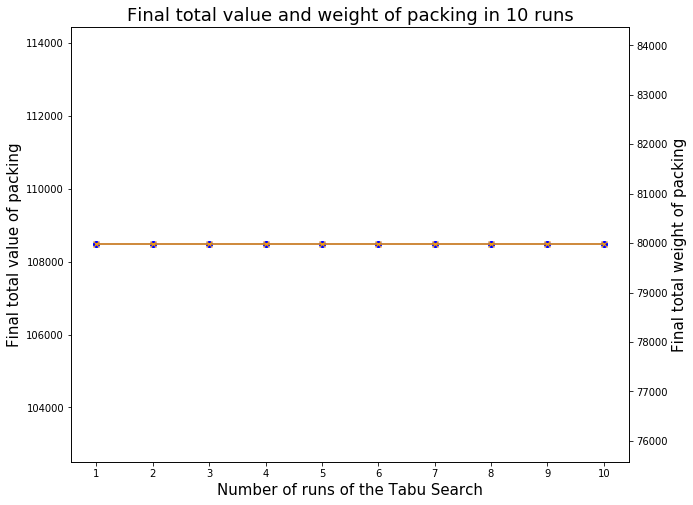


Average total value of packing in 10 runs = 108474.0 

Average total weight of packing in 10 runs = 79974.0 


In [13]:
graphGenerator(arrVal, arrWei, name, runNums)